In [3]:
import pyreadr

In [9]:
import pyreadr

# Specify the path to your RData file
rdata_file = "final.RDATA"

# Use pyreadr to read the RData file
result = pyreadr.read_r(rdata_file)


# Extract the data frame from the RData file
# You can access it using dictionary-like syntax
data_frame = result[list(result.keys())[0]]  # Assuming there's only one data frame in the RData file

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind

In [13]:
total = data_frame

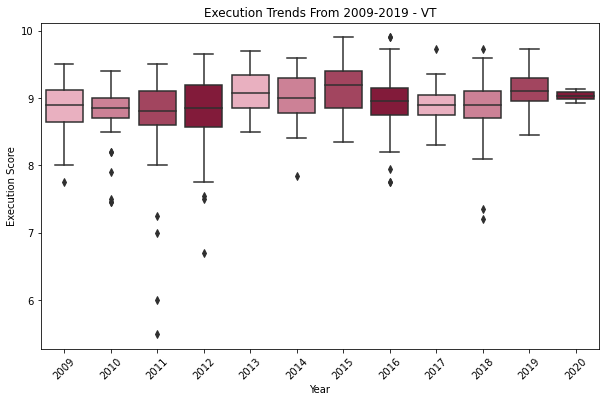

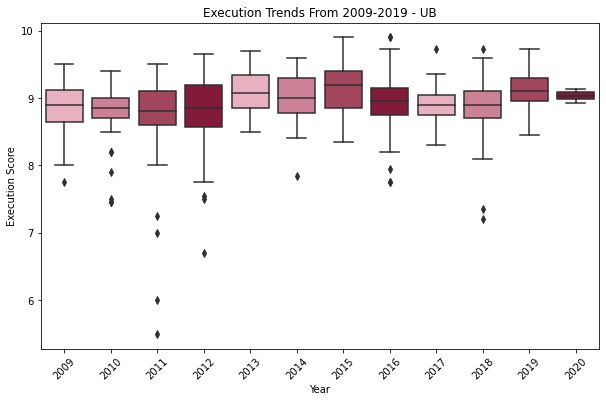

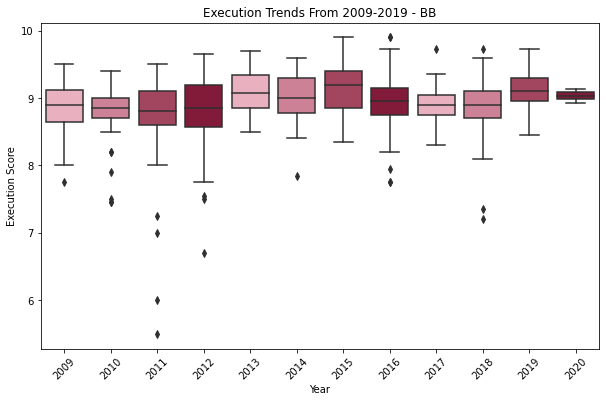

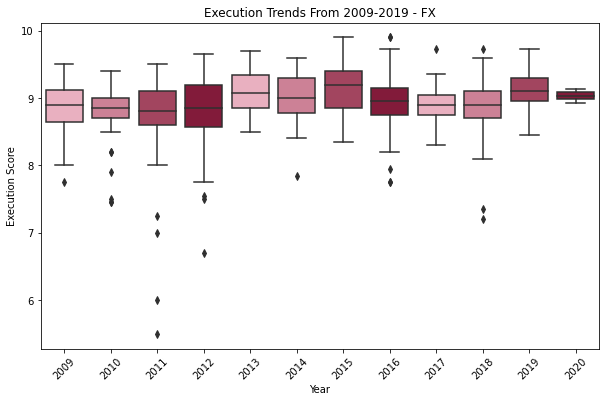

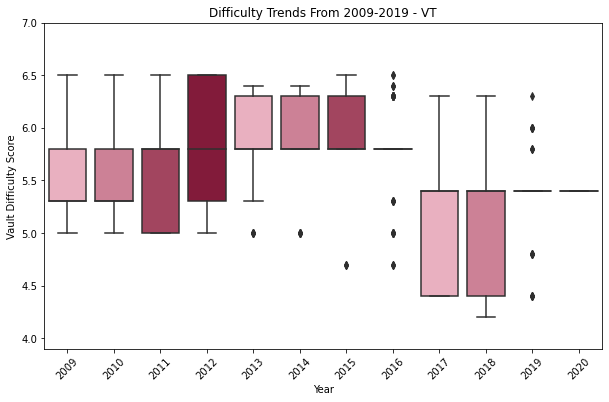

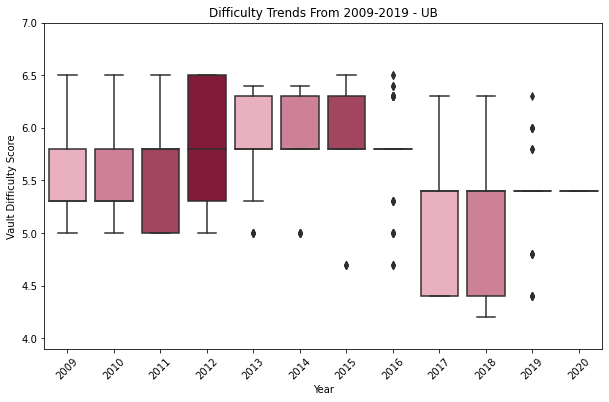

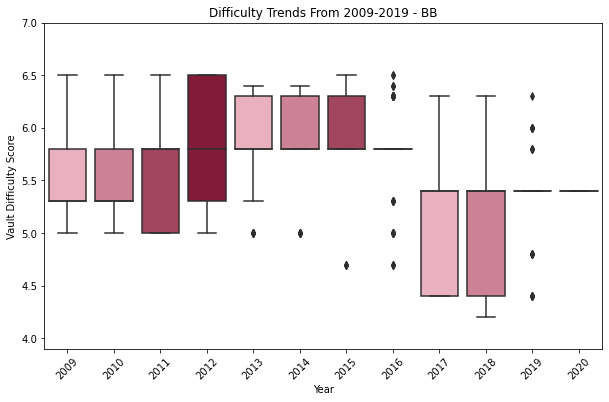

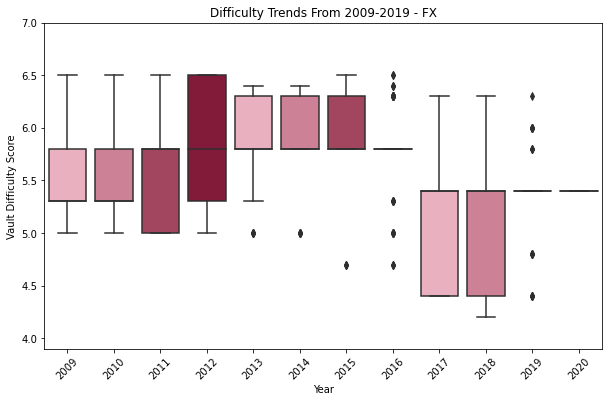

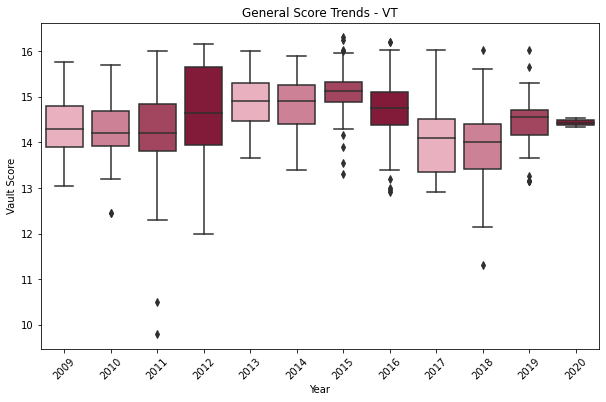

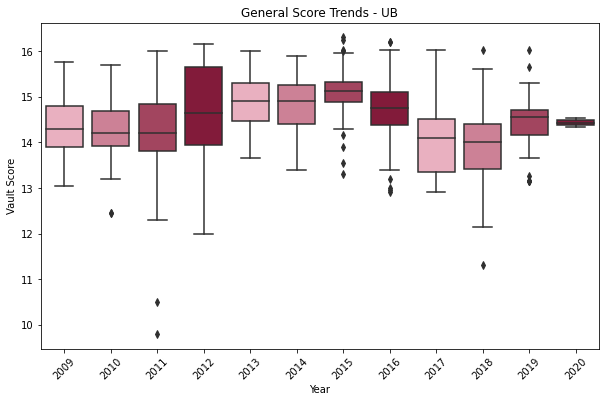

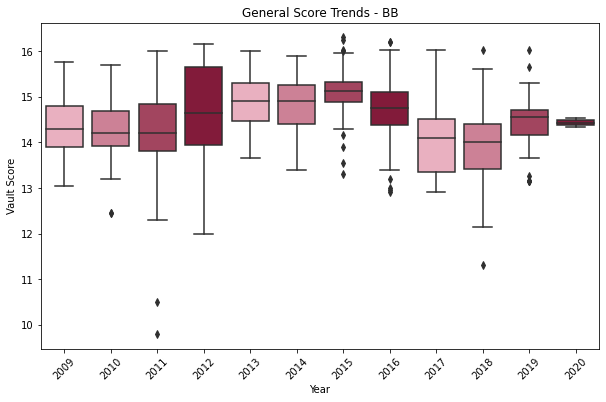

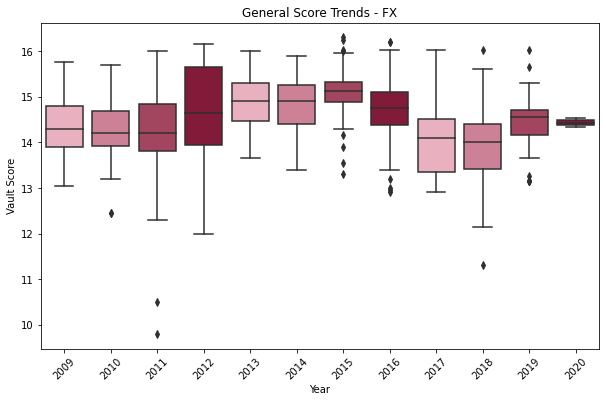

In [15]:
# Replace 0 values with NaN
total.replace(0, np.nan, inplace=True)

# Filter data for USA gymnasts excluding 2020
totalUSA = total[(total['Country'] == 'USA') & (total['year'] != 2020)]

# Define color palettes
colors = ["#D6D3E5", "#AFA2E8", "#8069E5", "#6A4FE2"]
colors2 = ["#F2A7BC", "#D87591", "#B23558", "#930A33"]

# Execution Quad Graphs
def plot_execution(data, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='year', y='ExVT', palette=colors2)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Execution Score")
    plt.xticks(rotation=45)
    plt.show()

plot_execution(totalUSA, "Execution Trends From 2009-2019 - VT")
plot_execution(totalUSA, "Execution Trends From 2009-2019 - UB")
plot_execution(totalUSA, "Execution Trends From 2009-2019 - BB")
plot_execution(totalUSA, "Execution Trends From 2009-2019 - FX")

# Difficulty Quad Graphs
def plot_difficulty(data, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='year', y='DiffVT', palette=colors2)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Vault Difficulty Score")
    plt.ylim(3.9, 7)
    plt.xticks(rotation=45)
    plt.show()

plot_difficulty(totalUSA, "Difficulty Trends From 2009-2019 - VT")
plot_difficulty(totalUSA, "Difficulty Trends From 2009-2019 - UB")
plot_difficulty(totalUSA, "Difficulty Trends From 2009-2019 - BB")
plot_difficulty(totalUSA, "Difficulty Trends From 2009-2019 - FX")

# Explore General score trends
def plot_score(data, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='year', y='VT', palette=colors2)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Vault Score")
    plt.xticks(rotation=45)
    plt.show()

plot_score(totalUSA, "General Score Trends - VT")
plot_score(totalUSA, "General Score Trends - UB")
plot_score(totalUSA, "General Score Trends - BB")
plot_score(totalUSA, "General Score Trends - FX")

# Post Hoc and Tukey
# You can use statsmodels or scipy for ANOVA and Tukey's test in Python.

# Continue with other parts of your R code as needed.


In [16]:
df = total

In [20]:
df.columns

Index(['First', 'Last', 'Country', 'DiffVT', 'DiffUB', 'DiffBB', 'DiffFX',
       'ExVT', 'ExUB', 'ExBB', 'ExFX', 'VT', 'UB', 'BB', 'FX', 'AA', 'Rank',
       'Date', 'Meet', 'month', 'year', 'third', 'VaultRank', 'BarsRank',
       'BeamRank', 'FloorRank'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   First      1233 non-null   object  
 1   Last       1231 non-null   object  
 2   Country    1207 non-null   category
 3   DiffVT     981 non-null    float64 
 4   DiffUB     1003 non-null   float64 
 5   DiffBB     1027 non-null   float64 
 6   DiffFX     956 non-null    float64 
 7   ExVT       981 non-null    float64 
 8   ExUB       1003 non-null   float64 
 9   ExBB       1027 non-null   float64 
 10  ExFX       956 non-null    float64 
 11  VT         1129 non-null   float64 
 12  UB         1154 non-null   float64 
 13  BB         1180 non-null   float64 
 14  FX         1107 non-null   float64 
 15  AA         1204 non-null   float64 
 16  Rank       1257 non-null   int32   
 17  Date       1257 non-null   object  
 18  Meet       1257 non-null   category
 19  month      1257 non-null   

In [24]:
# List of columns with difficulty scores (modify as needed)
difficulty_columns = [col for col in df.columns if 'Diff' in col]

# List of columns with execution scores (modify as needed)
execution_columns = [col for col in df.columns if 'Ex' in col]


In [32]:
from scipy.stats import linregress

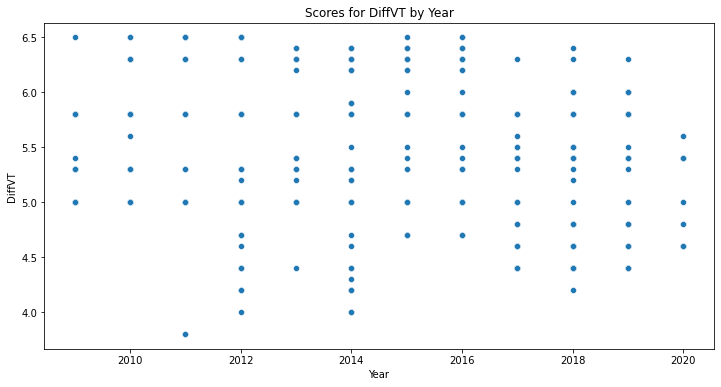

Event: DiffVT
R-squared: 0.01
Slope: -0.02
P-value: 3.42e-04


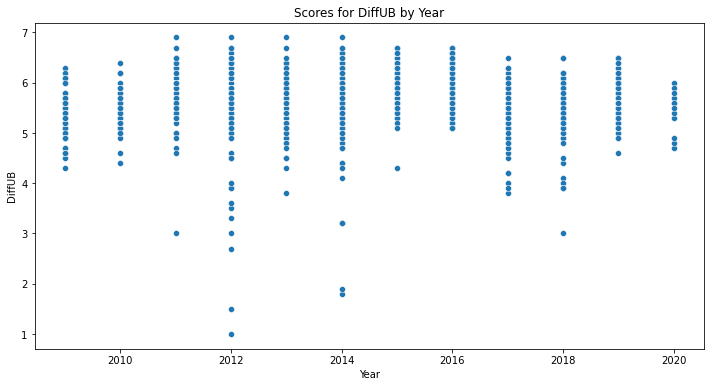

Event: DiffUB
R-squared: 0.00
Slope: 0.01
P-value: 2.83e-02


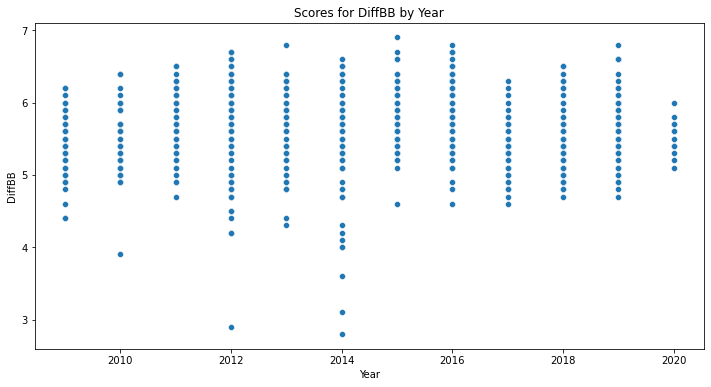

Event: DiffBB
R-squared: 0.00
Slope: 0.01
P-value: 3.08e-02


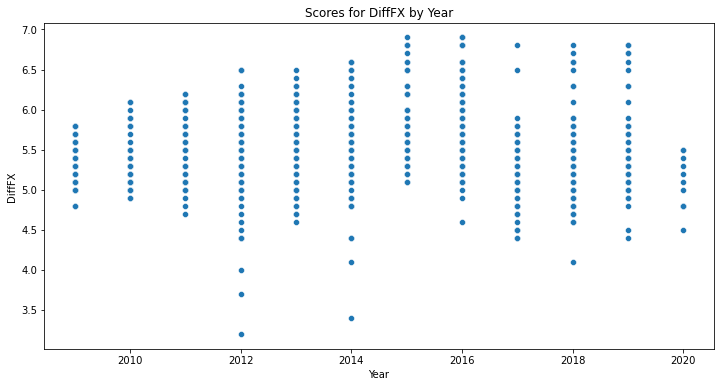

Event: DiffFX
R-squared: 0.00
Slope: 0.00
P-value: 6.94e-01


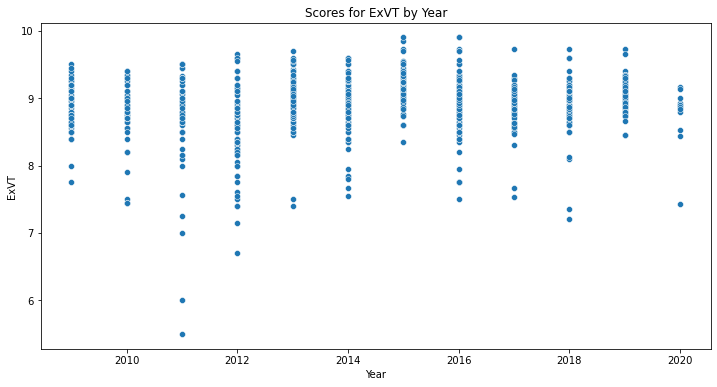

Event: ExVT
R-squared: 0.02
Slope: 0.02
P-value: 9.30e-07


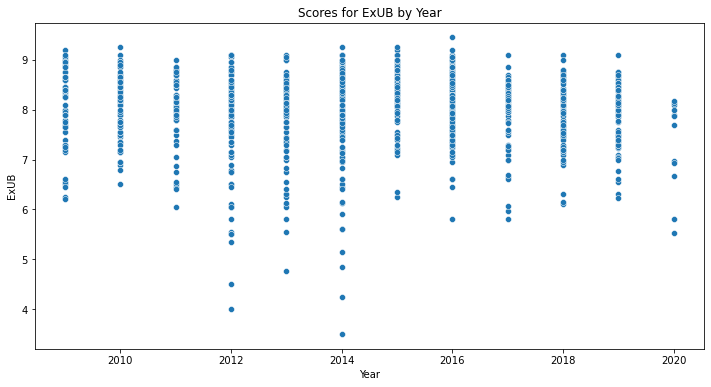

Event: ExUB
R-squared: 0.00
Slope: -0.00
P-value: 9.16e-01


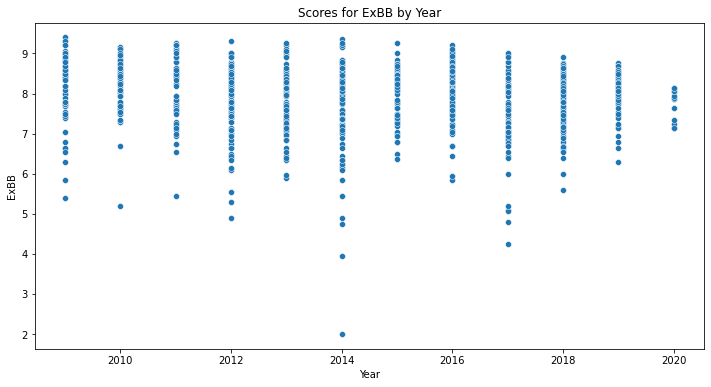

Event: ExBB
R-squared: 0.01
Slope: -0.03
P-value: 1.74e-03


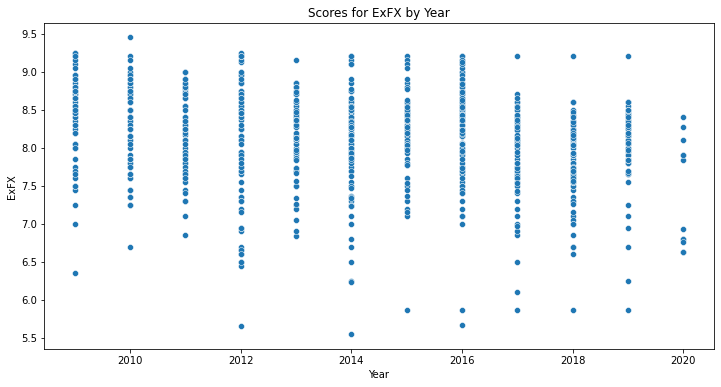

Event: ExFX
R-squared: 0.04
Slope: -0.04
P-value: 6.08e-10


In [34]:

# Convert the 'year' column to numeric if it's not already
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# List of columns with difficulty scores (modify as needed)
difficulty_columns = [col for col in df.columns if 'Diff' in col]

# List of columns with execution scores (modify as needed)
execution_columns = [col for col in df.columns if 'Ex' in col]

# Function to perform linear regression and plot the results
def analyze_event(df, event_column):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='year', y=event_column, data=df)
    plt.title(f'Scores for {event_column} by Year')
    plt.xlabel('Year')
    plt.ylabel(event_column)
    plt.show()

    # Perform linear regression
    valid_data = df.dropna(subset=[event_column, 'year'])
    result = linregress(valid_data['year'], valid_data[event_column])
    print(f"Event: {event_column}")
    print(f"R-squared: {result.rvalue**2:.2f}")
    print(f"Slope: {result.slope:.2f}")
    print(f"P-value: {result.pvalue:.2e}")

# Difficulty Analysis
for event in difficulty_columns:
    analyze_event(df, event)

# Execution Analysis
for event in execution_columns:
    analyze_event(df, event)


In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [36]:
# Replace 0 with NaN
total = total.replace(0, float("NaN"))

# Filter for USA gymnasts only and exclude the year 2020
totalUSA = total[(total['Country'] == "USA") & (total['year'] != 2020)]

# Define color schemes
colors = ['#D6D3E5', '#AFA2E8', '#8069E5', '#6A4FE2']
colors2 = ['#F2A7BC', '#D87591', '#B23558', '#930A33']


In [40]:
total.columns

Index(['First', 'Last', 'Country', 'DiffVT', 'DiffUB', 'DiffBB', 'DiffFX',
       'ExVT', 'ExUB', 'ExBB', 'ExFX', 'VT', 'UB', 'BB', 'FX', 'AA', 'Rank',
       'Date', 'Meet', 'month', 'year', 'third', 'VaultRank', 'BarsRank',
       'BeamRank', 'FloorRank'],
      dtype='object')

In [43]:
from matplotlib.ticker import MaxNLocator

In [74]:
totalUSA

,First,Last,Country,DiffVT,DiffUB,DiffBB,DiffFX,ExVT,ExUB,ExBB,...,Rank,Date,Meet,month,year,third,VaultRank,BarsRank,BeamRank,FloorRank
0,KAMERIN,MOORE,USA,5.3,5.2,5.4,5.5,9.000,8.750,8.000,...,1,2009-02-20,USA vs Japan Friendship Meet,2,2009,1,2.0,1.0,2.0,1.0
1,MACKENZIE,CAQUATTO,USA,5.8,5.7,5.6,5.6,9.000,8.000,7.700,...,2,2009-02-20,USA vs Japan Friendship Meet,2,2009,1,1.0,2.0,3.0,1.0
2,HALLIE,MOSSETT,USA,5.0,5.1,5.1,5.3,8.950,8.650,8.400,...,4,2009-02-20,USA vs Japan Friendship Meet,2,2009,2,2.0,2.0,2.0,2.0
3,BRIDGETTE,CAQUATTO,USA,5.8,5.3,5.4,5.3,8.850,7.650,8.850,...,3,2009-02-20,USA vs Japan Friendship Meet,2,2009,1,1.0,3.0,1.0,2.0
4,YUKO,SHINTAKE,JPN,5.0,5.7,5.7,5.1,8.550,8.300,7.050,...,5,2009-02-20,USA vs Japan Friendship Meet,2,2009,2,3.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,GIORGIA,VILLA,ITA,5.4,5.8,5.4,5.0,8.900,6.966,7.133,...,7,2020-03-07,American Cup,3,2020,2,2.0,3.0,4.0,3.0
1253,GEORGIA,GODWIN,AUS,4.8,5.4,5.6,5.2,8.866,7.700,7.633,...,6,2020-03-07,American Cup,3,2020,2,3.0,3.0,2.0,3.0
1254,SARAH,VOSS,GER,5.0,5.6,5.7,4.8,7.433,7.866,7.233,...,11,2020-03-07,American Cup,3,2020,3,4.0,2.0,3.0,4.0
1255,ALBA,PETISCO,ESP,4.6,4.9,5.3,4.8,8.800,6.933,7.133,...,12,2020-03-07,American Cup,3,2020,3,4.0,3.0,4.0,4.0


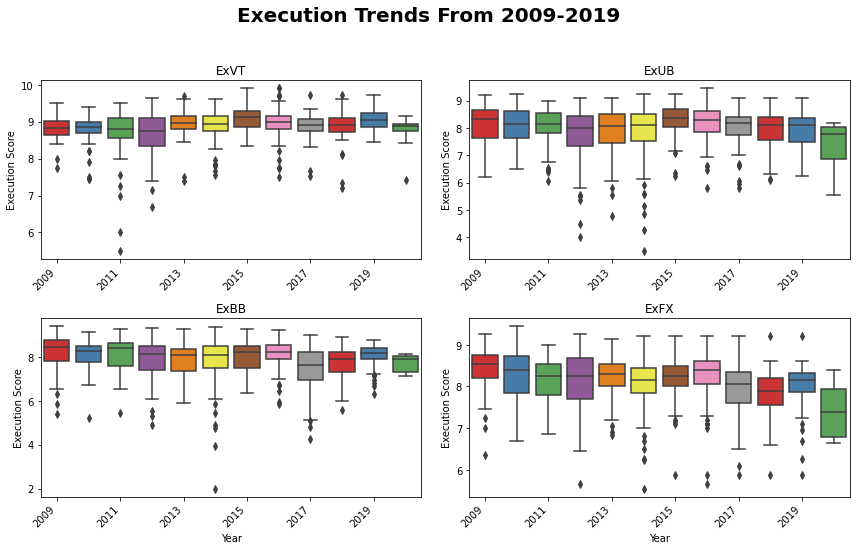

In [50]:
totalUSA=data_frame

# Define the color palette
colors = sns.color_palette("Set1")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Execution Trends From 2009-2019", fontsize=20, fontweight='bold')

# Plot ExVT
sns.boxplot(x='year', y='ExVT', data=totalUSA, palette=colors, ax=axes[0, 0])
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Execution Score')
axes[0, 0].set_title('ExVT')

# Plot ExUB
sns.boxplot(x='year', y='ExUB', data=totalUSA, palette=colors, ax=axes[0, 1])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Execution Score')
axes[0, 1].set_title('ExUB')

# Plot ExBB
sns.boxplot(x='year', y='ExBB', data=totalUSA, palette=colors, ax=axes[1, 0])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Execution Score')
axes[1, 0].set_title('ExBB')

# Plot ExFX
sns.boxplot(x='year', y='ExFX', data=totalUSA, palette=colors, ax=axes[1, 1])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Execution Score')
axes[1, 1].set_title('ExFX')


# Rotate x-axis labels
for ax in axes.flat:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Remove x-axis label from the top row
axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')

# Adjust spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

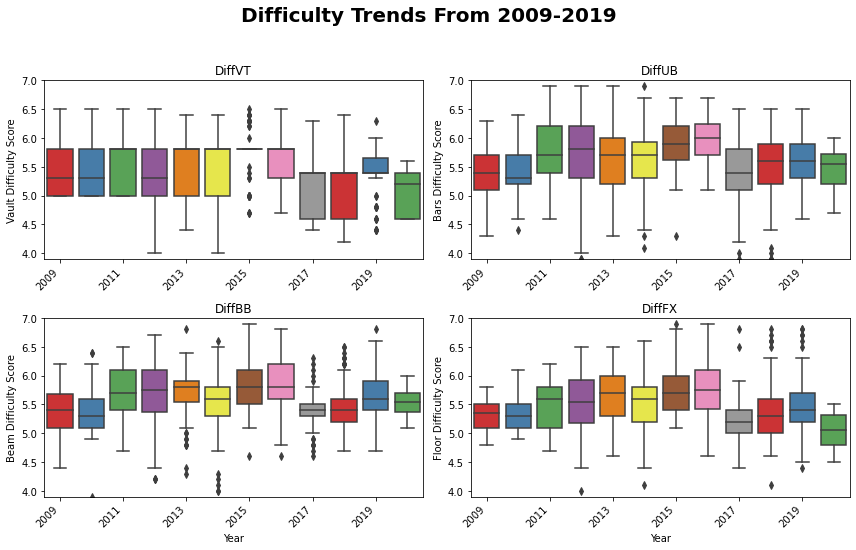

In [51]:

# Define the color palette
colors = sns.color_palette("Set1")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Difficulty Trends From 2009-2019", fontsize=20, fontweight='bold')

# Plot DiffVT
sns.boxplot(x='year', y='DiffVT', data=totalUSA, palette=colors, ax=axes[0, 0])
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Vault Difficulty Score')
axes[0, 0].set_title('DiffVT')
axes[0, 0].set_ylim(3.9, 7)

# Plot DiffUB
sns.boxplot(x='year', y='DiffUB', data=totalUSA, palette=colors, ax=axes[0, 1])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Bars Difficulty Score')
axes[0, 1].set_title('DiffUB')
axes[0, 1].set_ylim(3.9, 7)

# Plot DiffBB
sns.boxplot(x='year', y='DiffBB', data=totalUSA, palette=colors, ax=axes[1, 0])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Beam Difficulty Score')
axes[1, 0].set_title('DiffBB')
axes[1, 0].set_ylim(3.9, 7)

# Plot DiffFX
sns.boxplot(x='year', y='DiffFX', data=totalUSA, palette=colors, ax=axes[1, 1])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Floor Difficulty Score')
axes[1, 1].set_title('DiffFX')
axes[1, 1].set_ylim(3.9, 7)

# Rotate x-axis labels
for ax in axes.flat:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Remove x-axis label from the top row
axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')

# Adjust spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


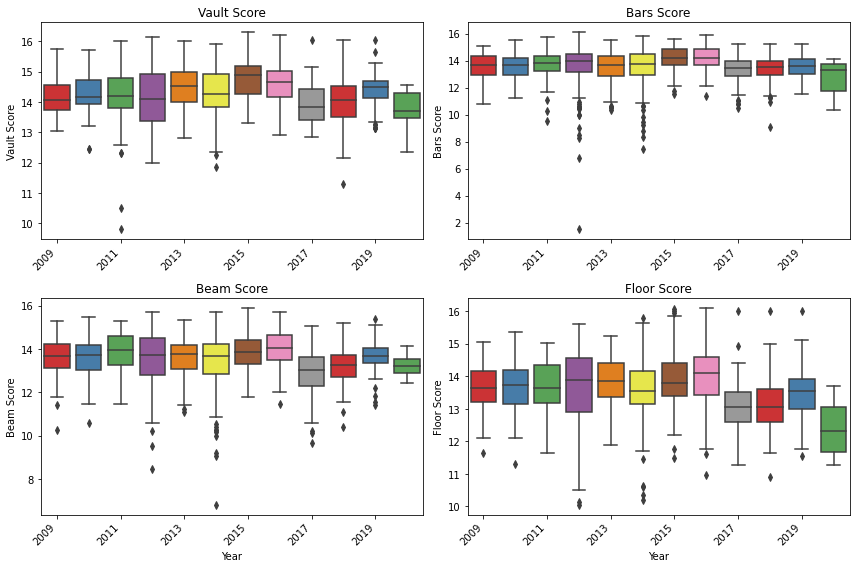

In [52]:

# Define the color palette
colors = sns.color_palette("Set1")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot VT
sns.boxplot(x='year', y='VT', data=totalUSA, palette=colors, ax=axes[0, 0])
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Vault Score')
axes[0, 0].set_title('Vault Score')

# Plot UB
sns.boxplot(x='year', y='UB', data=totalUSA, palette=colors, ax=axes[0, 1])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Bars Score')
axes[0, 1].set_title('Bars Score')

# Plot BB
sns.boxplot(x='year', y='BB', data=totalUSA, palette=colors, ax=axes[1, 0])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Beam Score')
axes[1, 0].set_title('Beam Score')

# Plot FX
sns.boxplot(x='year', y='FX', data=totalUSA, palette=colors, ax=axes[1, 1])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Floor Score')
axes[1, 1].set_title('Floor Score')

# Rotate x-axis labels
for ax in axes.flat:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


In [61]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [83]:

# Define the quads
quad1 = totalUSA[totalUSA['year'].isin([2009, 2010, 2011, 2012])]
quad2 = totalUSA[totalUSA['year'].isin([2013, 2014, 2015, 2016])]
quad3 = totalUSA[totalUSA['year'].isin([2017, 2018, 2019])]

In [85]:


def perform_tukey_hsd(quad_df, response_var):
    try:
        model = sm.OLS.from_formula(f'{response_var} ~ year', data=quad_df.dropna(subset=[response_var])).fit()
        tukey_result = pairwise_tukeyhsd(endog=quad_df.dropna(subset=[response_var])[response_var],
                                         groups=quad_df.dropna(subset=[response_var])['year'],
                                         alpha=0.05)
        return model, tukey_result
    except Exception as e:
        return None, None

# Perform Tukey's HSD test for Quad 1 (Bars Difficulty)
model_quad1, tukey_quad1 = perform_tukey_hsd(quad1, 'DiffVT')
if model_quad1 is not None:
    print("Quad 1:")
    print(model_quad1.summary())
    print(tukey_quad1)

# Perform Tukey's HSD test for Quad 2 (Bars Difficulty)
model_quad2, tukey_quad2 = perform_tukey_hsd(quad2, 'DiffVT')
if model_quad2 is not None:
    print("Quad 2:")
    print(model_quad2.summary())
    print(tukey_quad2)

# Perform Tukey's HSD test for Quad 3 (Bars Difficulty)
model_quad3, tukey_quad3 = perform_tukey_hsd(quad3, 'DiffVT')
if model_quad3 is not None:
    print("Quad 3:")
    print(model_quad3.summary())
    print(tukey_quad3)


Quad 1:
                            OLS Regression Results                            
Dep. Variable:                 DiffVT   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.160
Date:                Wed, 06 Sep 2023   Prob (F-statistic):              0.282
Time:                        20:57:42   Log-Likelihood:                -237.86
No. Observations:                 294   AIC:                             479.7
Df Residuals:                     292   BIC:                             487.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.2704     55.455     -0.979 

In [86]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [87]:
# Debugging statements
print("Quad 1 'DiffUB' column:")
print(quad1['DiffUB'].dropna())

print("Quad 2 'DiffUB' column:")
print(quad2['DiffUB'].dropna())

print("Quad 3 'DiffUB' column:")
print(quad3['DiffUB'].dropna())

# Check if datasets have non-empty 'DiffUB' columns
if not quad1['DiffUB'].dropna().empty:
    # Perform ANOVA and Tukey's HSD for Quad 1
    model_quad1 = ols('DiffUB ~ year', data=quad1.dropna(subset=['DiffUB'])).fit()
    anova_quad1 = sm.stats.anova_lm(model_quad1, typ=2)
    tukey_quad1 = pairwise_tukeyhsd(endog=quad1.dropna(subset=['DiffUB'])['DiffUB'], groups=quad1.dropna(subset=['DiffUB'])['year'], alpha=0.05)

    print("\nQuad 1 ANOVA Summary:")
    print(anova_quad1)
    print("\nQuad 1 Tukey's HSD:")
    print(tukey_quad1)

if not quad2['DiffUB'].dropna().empty:
    # Perform ANOVA and Tukey's HSD for Quad 2
    model_quad2 = ols('DiffUB ~ year', data=quad2.dropna(subset=['DiffUB'])).fit()
    anova_quad2 = sm.stats.anova_lm(model_quad2, typ=2)
    tukey_quad2 = pairwise_tukeyhsd(endog=quad2.dropna(subset=['DiffUB'])['DiffUB'], groups=quad2.dropna(subset=['DiffUB'])['year'], alpha=0.05)

    print("\nQuad 2 ANOVA Summary:")
    print(anova_quad2)
    print("\nQuad 2 Tukey's HSD:")
    print(tukey_quad2)

if not quad3['DiffUB'].dropna().empty:
    # Perform ANOVA and Tukey's HSD for Quad 3
    model_quad3 = ols('DiffUB ~ year', data=quad3.dropna(subset=['DiffUB'])).fit()
    anova_quad3 = sm.stats.anova_lm(model_quad3, typ=2)
    tukey_quad3 = pairwise_tukeyhsd(endog=quad3.dropna(subset=['DiffUB'])['DiffUB'], groups=quad3.dropna(subset=['DiffUB'])['year'], alpha=0.05)

    print("\nQuad 3 ANOVA Summary:")
    print(anova_quad3)
    print("\nQuad 3 Tukey's HSD:")
    print(tukey_quad3)

Quad 1 'DiffUB' column:
0      5.2
1      5.7
2      5.1
3      5.3
4      5.7
      ... 
396    5.8
397    5.7
399    6.5
400    6.9
401    6.5
Name: DiffUB, Length: 297, dtype: float64
Quad 2 'DiffUB' column:
426    5.3
427    5.6
428    6.2
429    6.1
430    5.3
      ... 
916    6.2
917    6.6
918    6.3
919    6.3
920    6.5
Name: DiffUB, Length: 450, dtype: float64
Quad 3 'DiffUB' column:
921     6.1
922     5.9
923     5.6
924     5.5
925     5.6
       ... 
1240    5.6
1241    5.6
1242    5.6
1243    6.2
1244    5.1
Name: DiffUB, Length: 244, dtype: float64

Quad 1 ANOVA Summary:
              sum_sq     df         F    PR(>F)
year        1.741932    1.0  3.267545  0.071682
Residual  157.264802  295.0       NaN       NaN

Quad 1 Tukey's HSD:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  2009   2010   0.0033    1.0  -0.316 0.3226  False
  2009   2011   0.3232  0.064 -0

# BEAM DIFFICULTY

In [90]:
# Perform ANOVA and Tukey's HSD for Quad 1
model_quad1 = ols('DiffBB ~ year', data=quad1.dropna(subset=['DiffBB'])).fit()
tukey_quad1 = pairwise_tukeyhsd(endog=quad1.dropna(subset=['DiffBB'])['DiffBB'], groups=quad1.dropna(subset=['DiffBB'])['year'], alpha=0.05)
print("Quad 1:")
print(model_quad1.summary())
print(tukey_quad1)

# Perform ANOVA and Tukey's HSD for Quad 2
model_quad2 = ols('DiffBB ~ year', data=quad2.dropna(subset=['DiffBB'])).fit()
tukey_quad2 = pairwise_tukeyhsd(endog=quad2.dropna(subset=['DiffBB'])['DiffBB'], groups=quad2.dropna(subset=['DiffBB'])['year'], alpha=0.05)
print("Quad 2:")
print(model_quad2.summary())
print(tukey_quad2)

# Perform ANOVA and Tukey's HSD for Quad 3
model_quad3 = ols('DiffBB ~ year', data=quad3.dropna(subset=['DiffBB'])).fit()
tukey_quad3 = pairwise_tukeyhsd(endog=quad3.dropna(subset=['DiffBB'])['DiffBB'], groups=quad3.dropna(subset=['DiffBB'])['year'], alpha=0.05)
print("Quad 3:")
print(model_quad3.summary())
print(tukey_quad3)


Quad 1:
                            OLS Regression Results                            
Dep. Variable:                 DiffBB   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     15.54
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           9.93e-05
Time:                        21:00:07   Log-Likelihood:                -239.04
No. Observations:                 318   AIC:                             482.1
Df Residuals:                     316   BIC:                             489.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -193.5025     50.486     -3.833 

#  FLOOR DIFFICULTY

In [91]:
# Perform ANOVA and Tukey's HSD for Quad 1 - Floor Difficulty
model_quad1_fx = ols('DiffFX ~ year', data=quad1.dropna(subset=['DiffFX'])).fit()
tukey_quad1_fx = pairwise_tukeyhsd(endog=quad1.dropna(subset=['DiffFX'])['DiffFX'], groups=quad1.dropna(subset=['DiffFX'])['year'], alpha=0.05)
print("Quad 1 - Floor Difficulty:")
print(model_quad1_fx.summary())
print(tukey_quad1_fx)

# Perform ANOVA and Tukey's HSD for Quad 2 - Floor Difficulty
model_quad2_fx = ols('DiffFX ~ year', data=quad2.dropna(subset=['DiffFX'])).fit()
tukey_quad2_fx = pairwise_tukeyhsd(endog=quad2.dropna(subset=['DiffFX'])['DiffFX'], groups=quad2.dropna(subset=['DiffFX'])['year'], alpha=0.05)
print("Quad 2 - Floor Difficulty:")
print(model_quad2_fx.summary())
print(tukey_quad2_fx)

# Perform ANOVA and Tukey's HSD for Quad 3 - Floor Difficulty
model_quad3_fx = ols('DiffFX ~ year', data=quad3.dropna(subset=['DiffFX'])).fit()
tukey_quad3_fx = pairwise_tukeyhsd(endog=quad3.dropna(subset=['DiffFX'])['DiffFX'], groups=quad3.dropna(subset=['DiffFX'])['year'], alpha=0.05)
print("Quad 3 - Floor Difficulty:")
print(model_quad3_fx.summary())
print(tukey_quad3_fx)


Quad 1 - Floor Difficulty:
                            OLS Regression Results                            
Dep. Variable:                 DiffFX   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     6.215
Date:                Wed, 06 Sep 2023   Prob (F-statistic):             0.0132
Time:                        21:01:12   Log-Likelihood:                -166.72
No. Observations:                 280   AIC:                             337.4
Df Residuals:                     278   BIC:                             344.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -109.1964    